In [79]:
# create the workflow object
import os
import dharpa
from rich.jupyter import print
from dharpa import DHARPA_TOOLBOX_DEFAULT_WORKFLOWS_FOLDER
from dharpa.data.core import schemas_to_dict
from dharpa.graphs.utils import graph_to_image
from dharpa.utils import get_data_from_file

# Topic modelling dummy workflow

This notebook shows how we can create non-functional, dummy workflows, that still
already use a sensible internal module structure.

This will be useful so frontend work can happen independently from backend work.
Also, I imagine it'll be very useful for frontend testing.

## Workflow description

The following is a (simplified) dummy structure for the first part of the topic modelling workflow. Note how we 'hard-code' the input/output schemas as well as outputs. No real processing will happen. We can simulate time passing by providing a ``delay`` parameter (if we want).

In [80]:
print(get_data_from_file(os.path.join(DHARPA_TOOLBOX_DEFAULT_WORKFLOWS_FOLDER, "dummy", "topic_modelling.json")))

In [81]:
# NOTE: defaults in the dummy config schema are not functional yet, so all the inputs need to be specified

workflow = dharpa.create_workflow("topic_modelling")

# display the input schema
print("Input schema:")
print(schemas_to_dict(**workflow.input_schema))

In [82]:
# display the output schema
print("Output schema:")
print(schemas_to_dict(**workflow.output_schema))

In [83]:
# get the current state (string) of the workflow
print(f"Workflow state before inputs: {workflow.state}")

# set inputs
workflow.inputs.path_to_data = "doesnt_matter_since_its_all_fake_anyway"
workflow.inputs.parse_date = False
workflow.inputs.parse_isin = False
workflow.inputs.min_year = 1974
workflow.inputs.max_year = 1999
workflow.inputs.filter_tokens = False
workflow.inputs.tokenize = "word"
workflow.inputs.lowercase = True

# get the new state (string) of the workflow
print(f"Workflow state after inputs: {workflow.state}")

In [84]:
# now we execute the workflow
await workflow.process()

processing started: topic_modelling.topic_modelling
processing started: topic_modelling.data_upload
processing finished: topic_modelling.data_upload
processing started: topic_modelling.select_subset
processing finished: topic_modelling.select_subset
processing started: topic_modelling.pre_process
processing finished: topic_modelling.pre_process
processing finished: topic_modelling.topic_modelling


In [85]:
# let's look at the new state (string) of the workflow after processing
print(f"Workflow state after processing: {workflow.state}")

In [86]:
print(f"Workflow output values:")
print(workflow.outputs.ALL)

In [87]:
print("Workflow state details (simple):")
print(workflow.to_dict(include_structure=False))

In [88]:
print("Workflow state details (incl. internal structure):")
print(workflow.to_dict(include_structure=True))

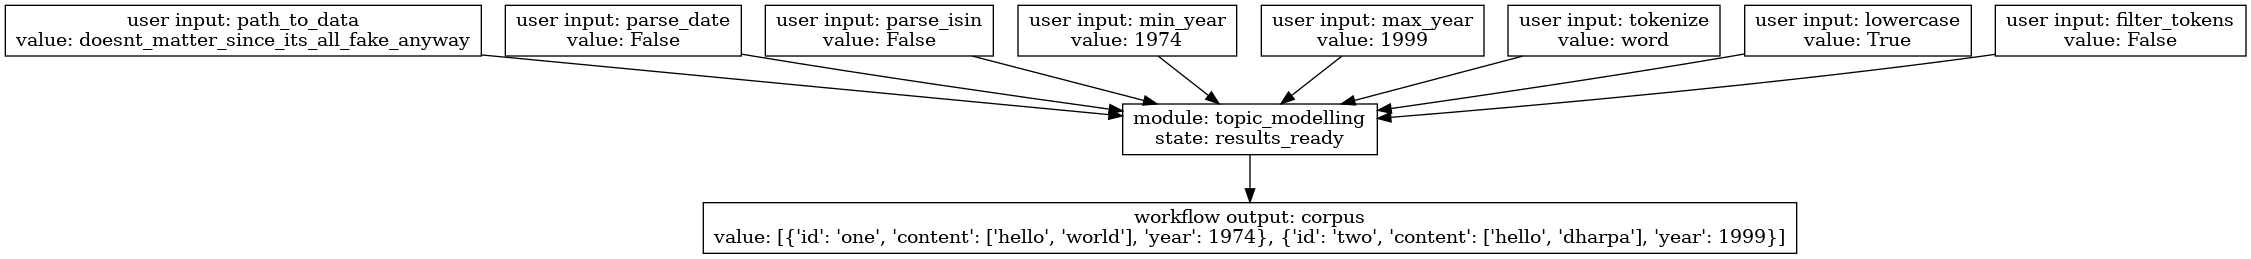

In [89]:
print("Workflow graph (simple)")
g = workflow.create_state_graph(show_structure=False)
graph_to_image(g)

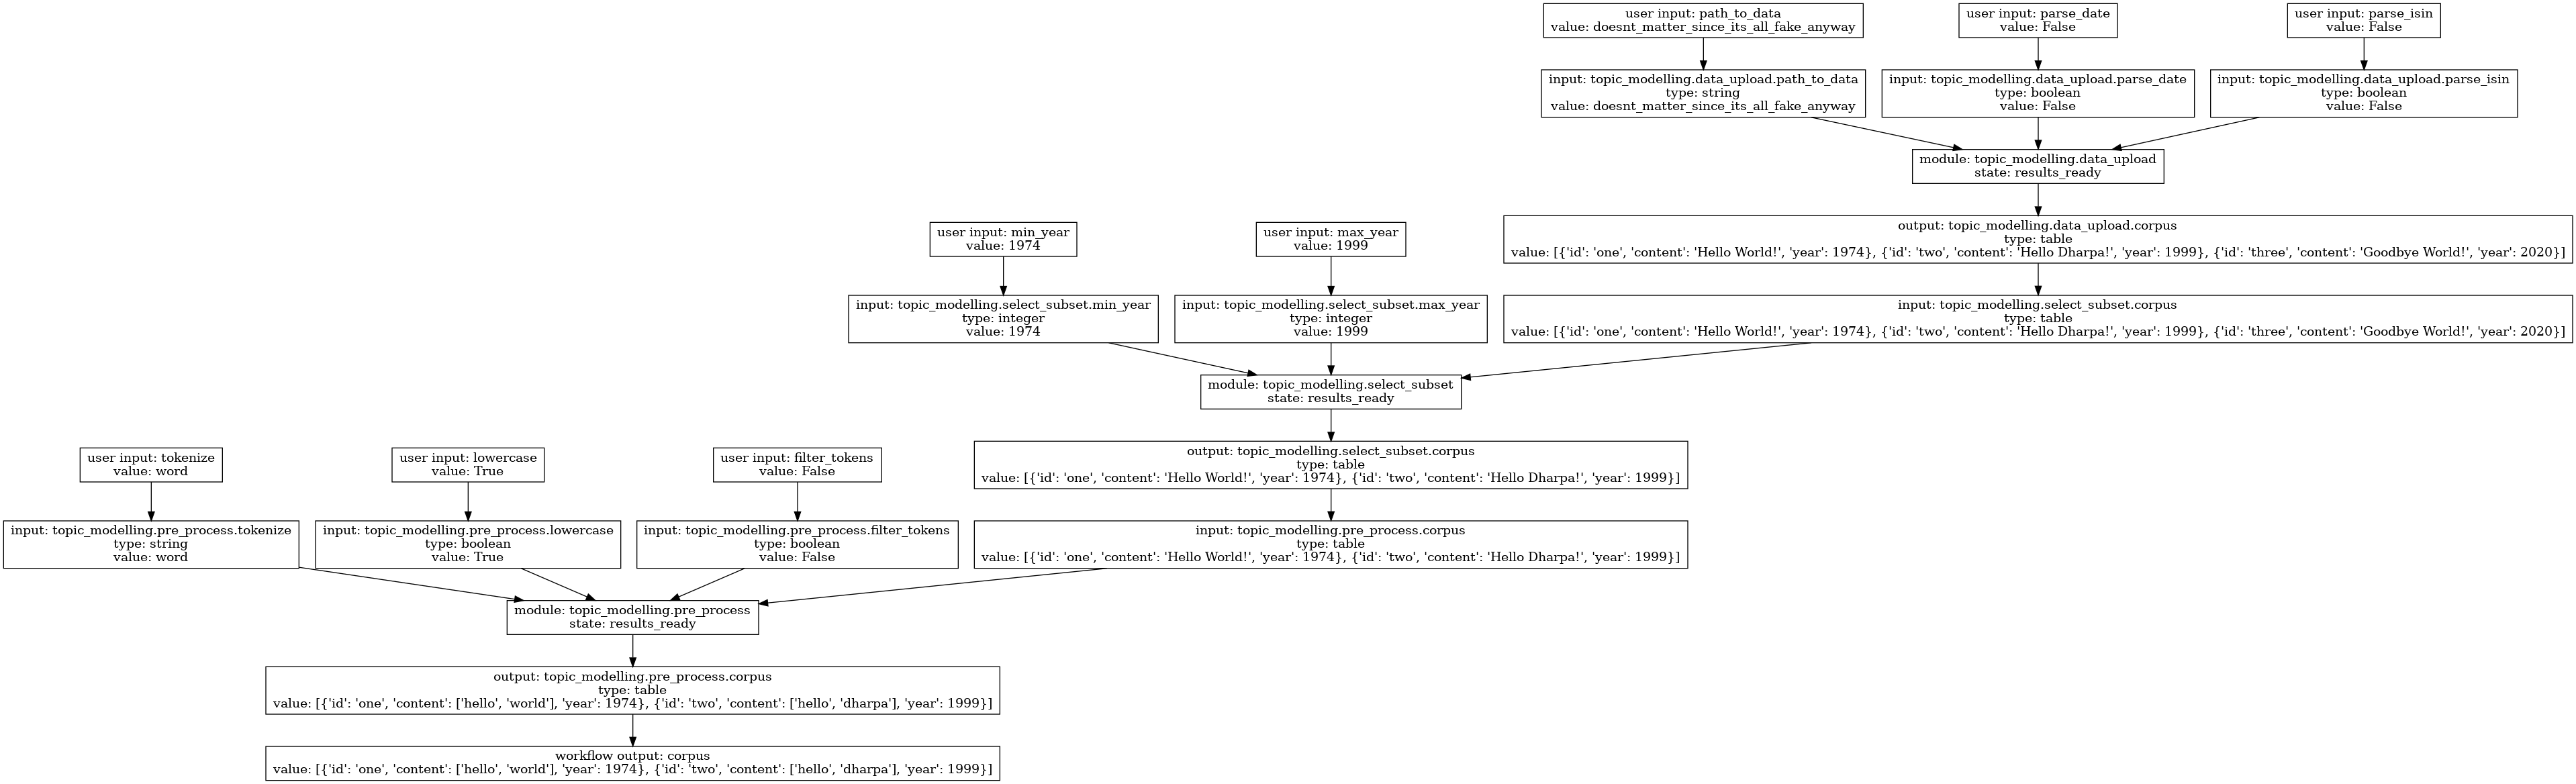

In [90]:
print("Workflow graph (incl. internal structure)")
g = workflow.create_state_graph(show_structure=True)
graph_to_image(g)
